Our aim in this notebook is to solve the binary classification problem regarding the two customer segmentation. 

First we load out dataset, begin to inspect, look for missing values, impute, etc.

In [190]:
import pandas as pd

df = pd.read_csv("output.csv")

In [191]:
# View the first few rows of the DataFrame
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  2174        1954  Graduation         Single  46344.0        1         1   
1  4141        1965  Graduation   Relationship  71613.0        0         0   
2  6182        1984  Graduation   Relationship  26646.0        1         0   
3  5324        1981         PhD   Relationship  58293.0        1         0   
4  7446        1967      Master   Relationship  62513.0        0         1   

  Dt_Customer  Recency  MntWines  ...  MntFishProducts  MntSweetProducts  \
0  2014-03-08       38        11  ...                2                 1   
1  2013-08-21       26       426  ...              111                21   
2  2014-02-10       26        11  ...               10                 3   
3  2014-01-19       94       173  ...               46                27   
4  2013-09-09       16       520  ...                0                42   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  

In [192]:
# View the last few rows of the DataFrame
print(df.tail())

        ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
1692  8372        1974  Graduation   Relationship  34421.0        1         0   
1693  4001        1946         PhD   Relationship  64014.0        2         1   
1694  7270        1981  Graduation         Single  56981.0        0         0   
1695  8235        1956      Master   Relationship  69245.0        0         1   
1696  9405        1954         PhD   Relationship  52869.0        1         1   

     Dt_Customer  Recency  MntWines  ...  MntFishProducts  MntSweetProducts  \
1692  2013-07-01       81         3  ...                6                 2   
1693  2014-06-10       56       406  ...                0                 0   
1694  2014-01-25       91       908  ...               32                12   
1695  2014-01-24        8       428  ...               80                30   
1696  2012-10-15       40        84  ...                2                 1   

      MntGoldProds  NumDealsPurchases 

In [193]:
# Get a concise summary of the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1697 non-null   int64  
 1   Year_Birth           1697 non-null   int64  
 2   Education            1697 non-null   object 
 3   Marital_Status       1697 non-null   object 
 4   Income               1697 non-null   float64
 5   Kidhome              1697 non-null   int64  
 6   Teenhome             1697 non-null   int64  
 7   Dt_Customer          1697 non-null   object 
 8   Recency              1697 non-null   int64  
 9   MntWines             1697 non-null   int64  
 10  MntFruits            1697 non-null   int64  
 11  MntMeatProducts      1697 non-null   int64  
 12  MntFishProducts      1697 non-null   int64  
 13  MntSweetProducts     1697 non-null   int64  
 14  MntGoldProds         1697 non-null   int64  
 15  NumDealsPurchases    1697 non-null   i

In [194]:

# Generate descriptive statistics
print(df.describe())

                 ID   Year_Birth        Income      Kidhome     Teenhome  \
count   1697.000000  1697.000000   1697.000000  1697.000000  1697.000000   
mean    5591.355333  1969.185622  45632.246774     0.542722     0.552740   
std     3262.119168    11.455372  18078.500559     0.548987     0.544878   
min        1.000000  1940.000000   3502.000000     0.000000     0.000000   
25%     2802.000000  1960.000000  31761.000000     0.000000     0.000000   
50%     5510.000000  1971.000000  44375.000000     1.000000     1.000000   
75%     8418.000000  1977.000000  58692.000000     1.000000     1.000000   
max    11191.000000  1996.000000  95169.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  1697.000000  1697.000000  1697.000000      1697.000000   
mean     48.964643   226.369476    12.780200        90.054213   
std      28.944949   300.259309    18.867291       127.433360   
min       0.000000     0.000000     0.000000         0.

In [195]:
# Get the dimensions of the DataFrame
print(df.shape)

(1697, 22)


In [196]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Check for cells containing the digit 0
zeros_cells = (df == 0).sum()

# Print the result for missing values
print("Missing values:")
print(missing_values)

# Print the result for cells containing the digit 0
print("\nCells containing the digit 0:")
print(zeros_cells)


Missing values:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Customer_For           0
Segment                0
dtype: int64

Cells containing the digit 0:
ID                        0
Year_Birth                0
Education                 0
Marital_Status            0
Income                    0
Kidhome                 821
Teenhome                801
Dt_Customer               0
Recency                  22
MntWines                 13
MntFruits               360
MntMeatProducts           1
MntFishProducts         353
MntSweetProducts        37

In [197]:
# Impute numerical columns with mean
numerical_cols = df.select_dtypes(include='number').columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Impute non-numerical columns with mode
non_numerical_cols = df.select_dtypes(exclude='number').columns
for col in non_numerical_cols:
    mode_val = df[col].mode()[0]  # Get the mode value for the column
    df[col] = df[col].fillna(mode_val)

# Verify that there are no missing values left
print("Remaining missing values after imputation:")
print(df.isnull().sum())

Remaining missing values after imputation:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Customer_For           0
Segment                0
dtype: int64


In [198]:
# One-hot encode non-numerical columns
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'])

# Drop the column Dt_Customer from df_encoded
df.drop(columns=['Dt_Customer'], inplace=True)

# Display the updated DataFrame
print(df.head())


     ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  2174        1954  46344.0        1         1       38        11          1   
1  4141        1965  71613.0        0         0       26       426         49   
2  6182        1984  26646.0        1         0       26        11          4   
3  5324        1981  58293.0        1         0       94       173         43   
4  7446        1967  62513.0        0         1       16       520         42   

   MntMeatProducts  MntFishProducts  ...  NumStorePurchases  \
0                6                2  ...                  2   
1              127              111  ...                 10   
2               20               10  ...                  4   
3              118               46  ...                  6   
4               98                0  ...                 10   

   NumWebVisitsMonth       Customer_For  Segment  Education_Foundational  \
0                  5   9763200000000000        0          

In [199]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display
import matplotlib.pyplot as plt

In [200]:
X = df.drop('Segment', axis=1)
y = df['Segment']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [201]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
print("Random Forest Classifier:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)

Random Forest Classifier:
Accuracy: 0.9882352941176471
Precision: 0.991304347826087
Recall: 0.9743589743589743
F1-score: 0.9827586206896551


In [202]:
# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
print("Support Vector Machine:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_svm)

Support Vector Machine:
Accuracy: 0.6558823529411765
Precision: 0.0
Recall: 0.0
F1-score: 0.0


C:\Users\abdul\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [203]:
# Logistic Regression (LR)
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
print("Logistic Regression:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-score:", f1_lr)

Logistic Regression:
Accuracy: 0.6558823529411765
Precision: 0.0
Recall: 0.0
F1-score: 0.0


C:\Users\abdul\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [204]:
# K Nearest Neighbor (K-NN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
print("K-Nearest Neighbors:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-score:", f1_knn)

K-Nearest Neighbors:
Accuracy: 0.6529411764705882
Precision: 0.49206349206349204
Recall: 0.26495726495726496
F1-score: 0.34444444444444444


In [205]:
# Naive Bayes (NB)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
print("Naive Bayes:")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1-score:", f1_nb)

Naive Bayes:
Accuracy: 0.6558823529411765
Precision: 0.0
Recall: 0.0
F1-score: 0.0


C:\Users\abdul\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


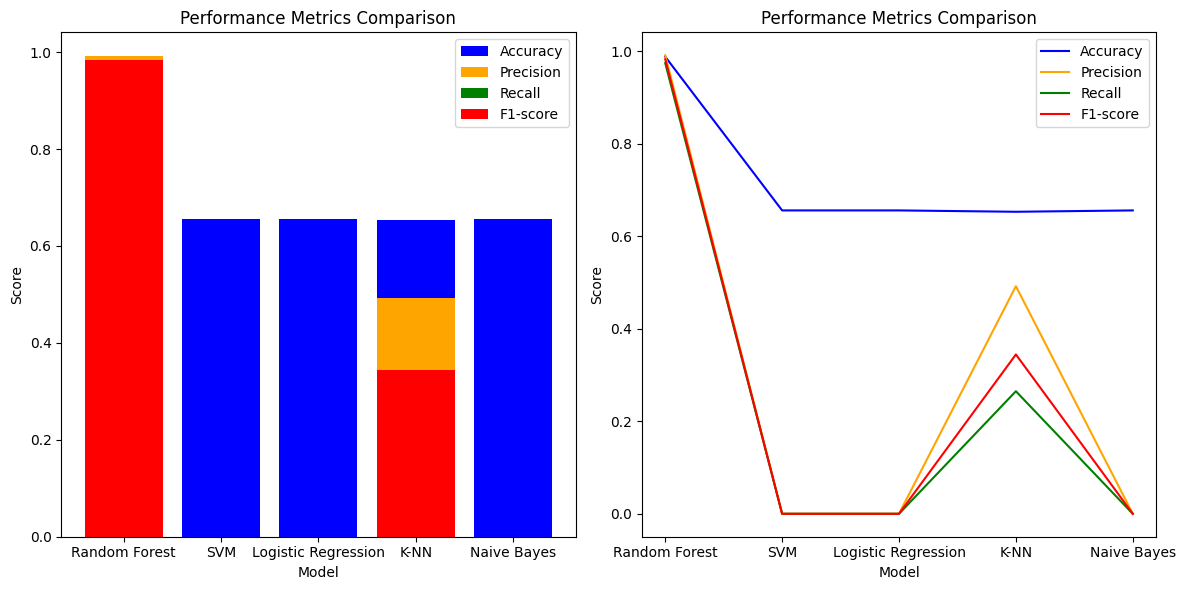

In [206]:
# Visualize the performance metrics
models = ['Random Forest', 'SVM', 'Logistic Regression', 'K-NN', 'Naive Bayes']
accuracy = [accuracy_rf, accuracy_svm, accuracy_lr, accuracy_knn, accuracy_nb]
precision = [precision_rf, precision_svm, precision_lr, precision_knn, precision_nb]
recall = [recall_rf, recall_svm, recall_lr, recall_knn, recall_nb]
f1 = [f1_rf, f1_svm, f1_lr, f1_knn, f1_nb]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(models, accuracy, color='blue', label='Accuracy')
plt.bar(models, precision, color='orange', label='Precision')
plt.bar(models, recall, color='green', label='Recall')
plt.bar(models, f1, color='red', label='F1-score')
plt.legend()
plt.title('Performance Metrics Comparison')
plt.xlabel('Model')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
plt.plot(models, accuracy, color='blue', label='Accuracy')
plt.plot(models, precision, color='orange', label='Precision')
plt.plot(models, recall, color='green', label='Recall')
plt.plot(models, f1, color='red', label='F1-score')
plt.legend()
plt.title('Performance Metrics Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

In [207]:
# Classification report
print("\nClassification Report:")
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred))
print("Support Vector Machine:")
print(classification_report(y_test, y_pred_svm))
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("K-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))
print("Naive Bayes:")
print(classification_report(y_test, y_pred_nb))


Classification Report:
Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       223
           1       0.99      0.97      0.98       117

    accuracy                           0.99       340
   macro avg       0.99      0.98      0.99       340
weighted avg       0.99      0.99      0.99       340

Support Vector Machine:
              precision    recall  f1-score   support

           0       0.66      1.00      0.79       223
           1       0.00      0.00      0.00       117

    accuracy                           0.66       340
   macro avg       0.33      0.50      0.40       340
weighted avg       0.43      0.66      0.52       340

Logistic Regression:
              precision    recall  f1-score   support

           0       0.66      1.00      0.79       223
           1       0.00      0.00      0.00       117

    accuracy                           0.66       340
   macro avg       0.33      0.50

C:\Users\abdul\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abdul\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abdul\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [208]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

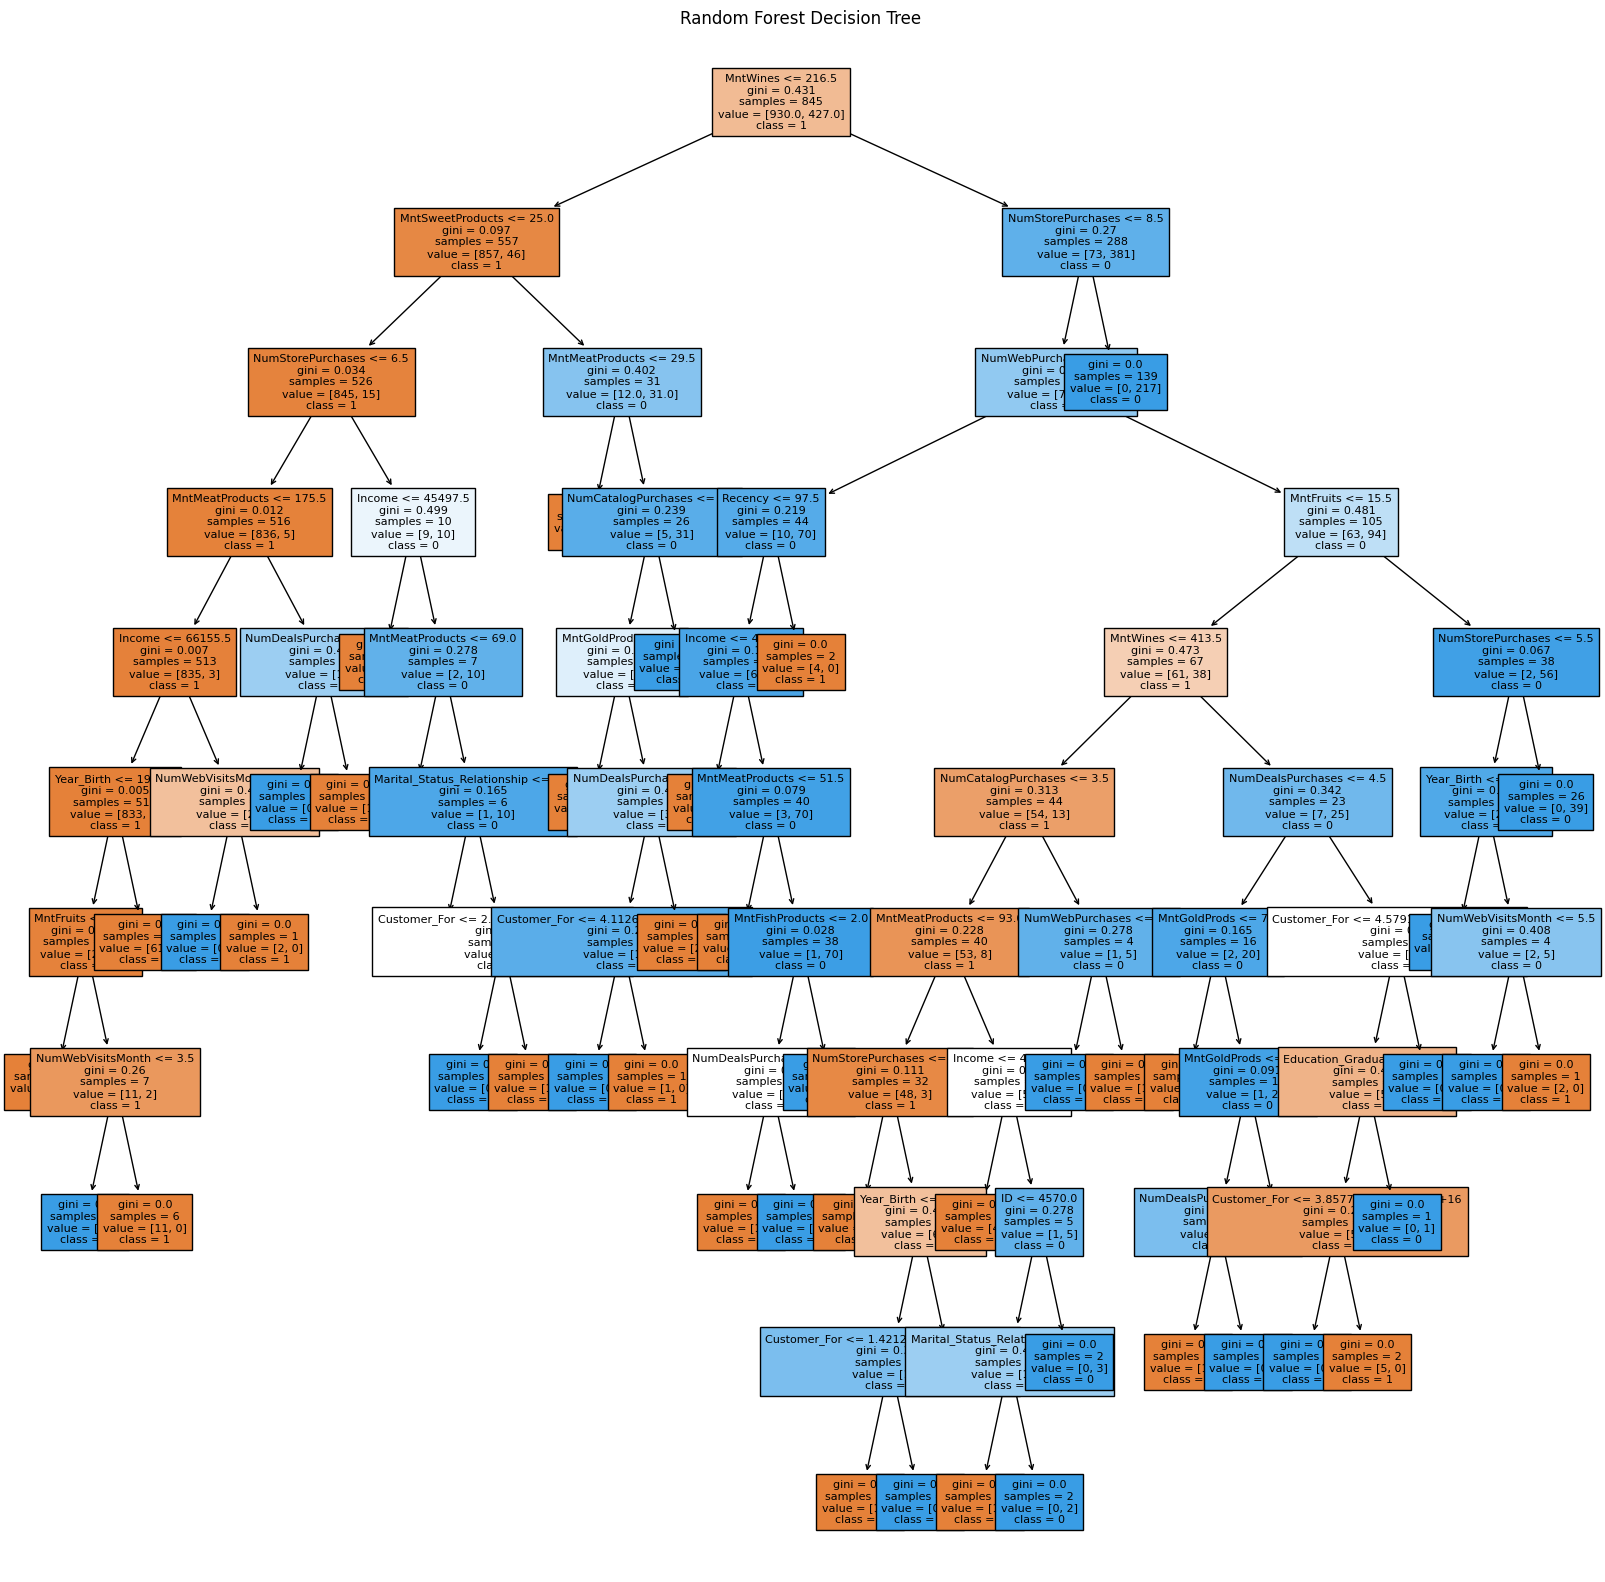

In [238]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(rf.estimators_[0], feature_names=X_train.columns, class_names=[str(c) for c in y_train.unique()], filled=True, fontsize=8)
plt.title("Random Forest Decision Tree")
plt.xlabel("Features")
plt.ylabel("Classes")
plt.show()

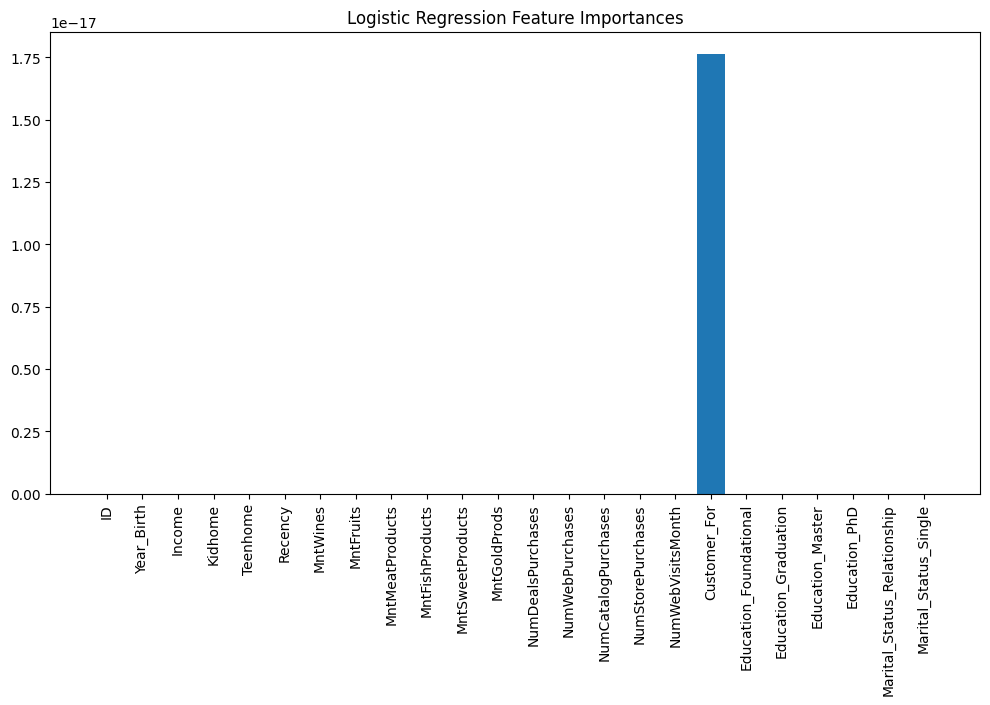

In [228]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
coef = lr_model.coef_[0]
feature_importances = abs(coef)
plt.figure(figsize=(12, 6))
plt.bar(X_train.columns, feature_importances)
plt.title("Logistic Regression Feature Importances")
plt.xticks(rotation=90)
plt.show()

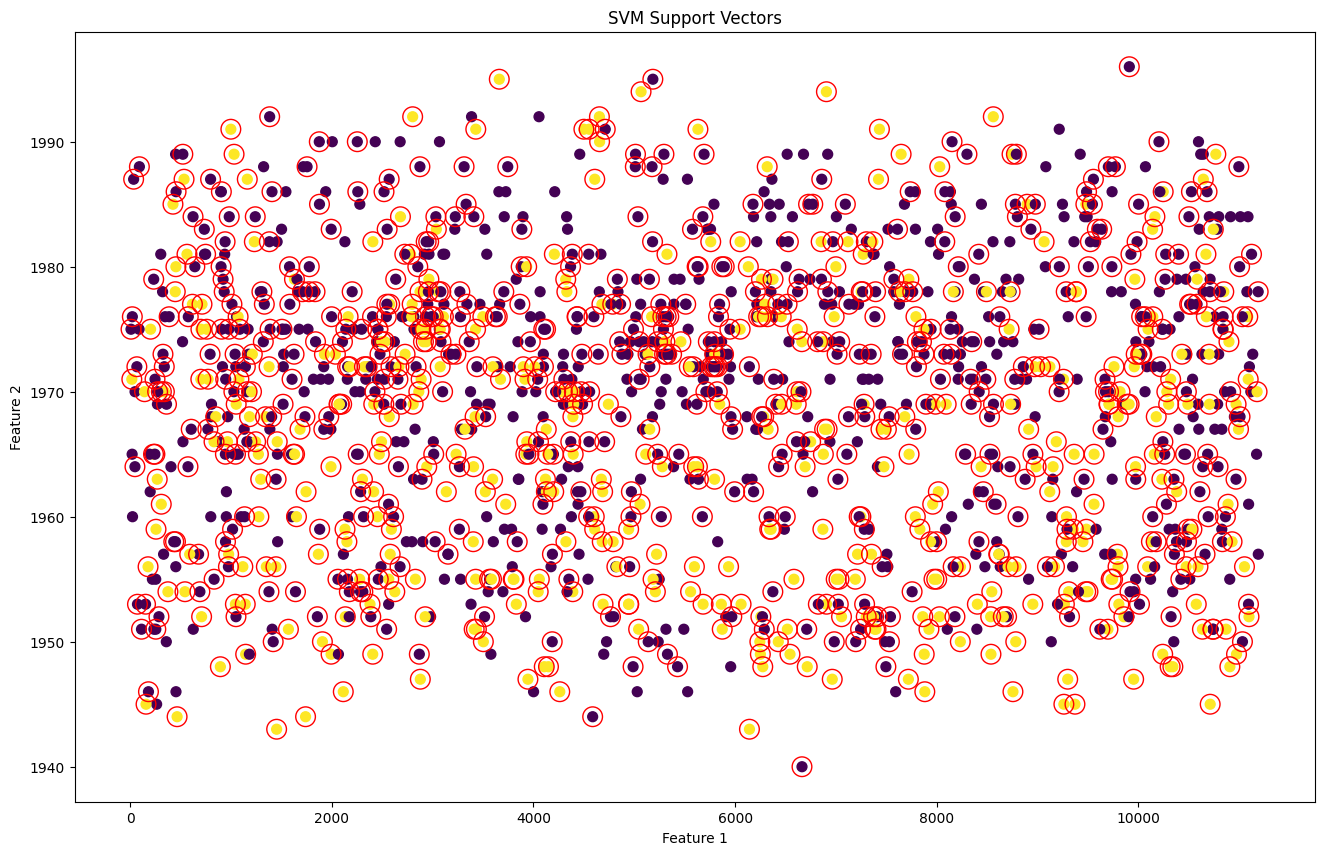

In [229]:
# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
support_vectors = svm_model.support_vectors_

plt.figure(figsize=(16, 10))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, s=50, cmap='viridis')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=200, facecolors='none', edgecolors='r')
plt.title("SVM Support Vectors")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

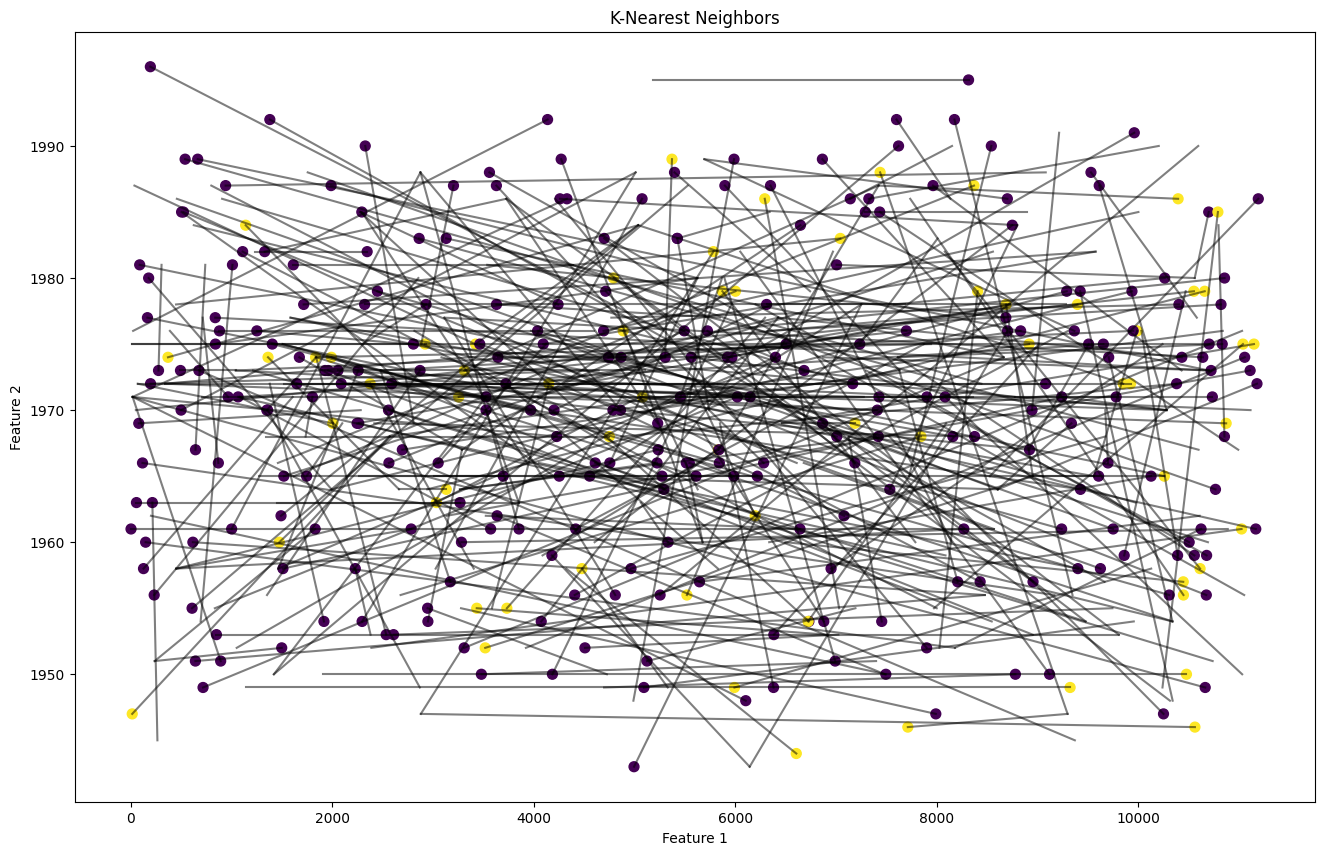

In [230]:
# K Nearest Neighbor (K-NN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
distances, indices = knn_model.kneighbors(X_test, n_neighbors=5)

plt.figure(figsize=(16, 10))
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=knn_model.predict(X_test), s=50, cmap='viridis')
for i in range(len(X_test)):
    plt.plot([X_test.iloc[i, 0], X_train.iloc[indices[i, 0], 0]], [X_test.iloc[i, 1], X_train.iloc[indices[i, 0], 1]], 'k-', alpha=0.5)
plt.title("K-Nearest Neighbors")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [231]:
# Naive Bayes (NB)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

print(f"nb_model.class_prior_.shape: {nb_model.class_prior_.shape}")
print(f"nb_model.theta_.shape: {nb_model.theta_.shape}")

nb_model.class_prior_.shape: (2,)
nb_model.theta_.shape: (2, 24)


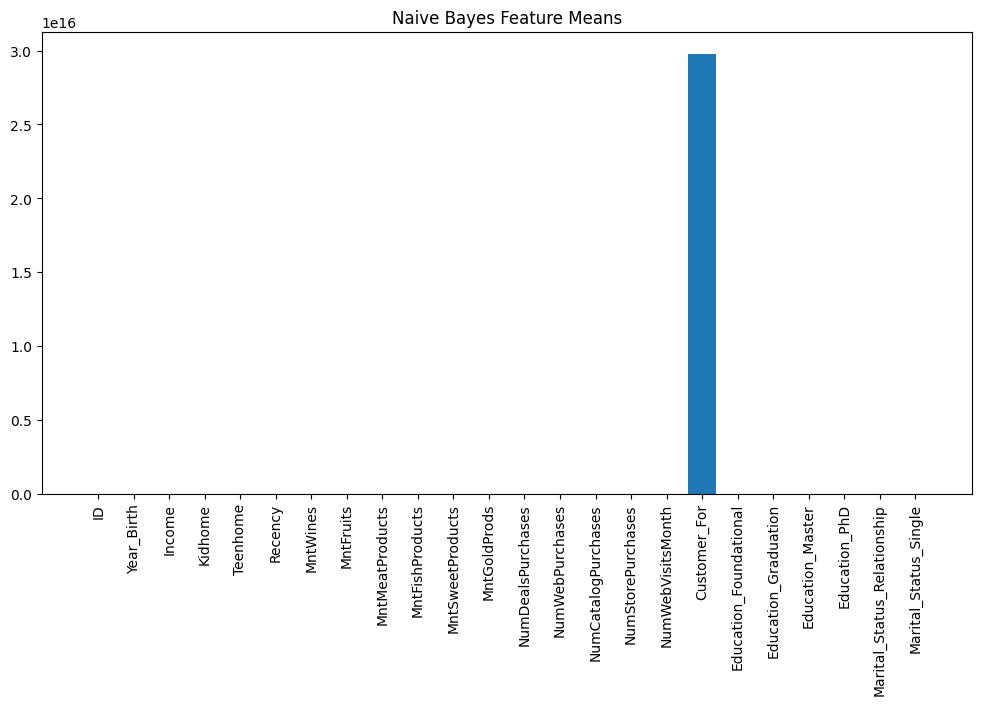

In [232]:
import matplotlib.pyplot as plt

# Naive Bayes (NB)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Get the feature means for each class
feature_means = nb_model.theta_

plt.figure(figsize=(12, 6))
plt.bar(X_train.columns, feature_means.mean(axis=0))
plt.title("Naive Bayes Feature Means")
plt.xticks(rotation=90)
plt.show()

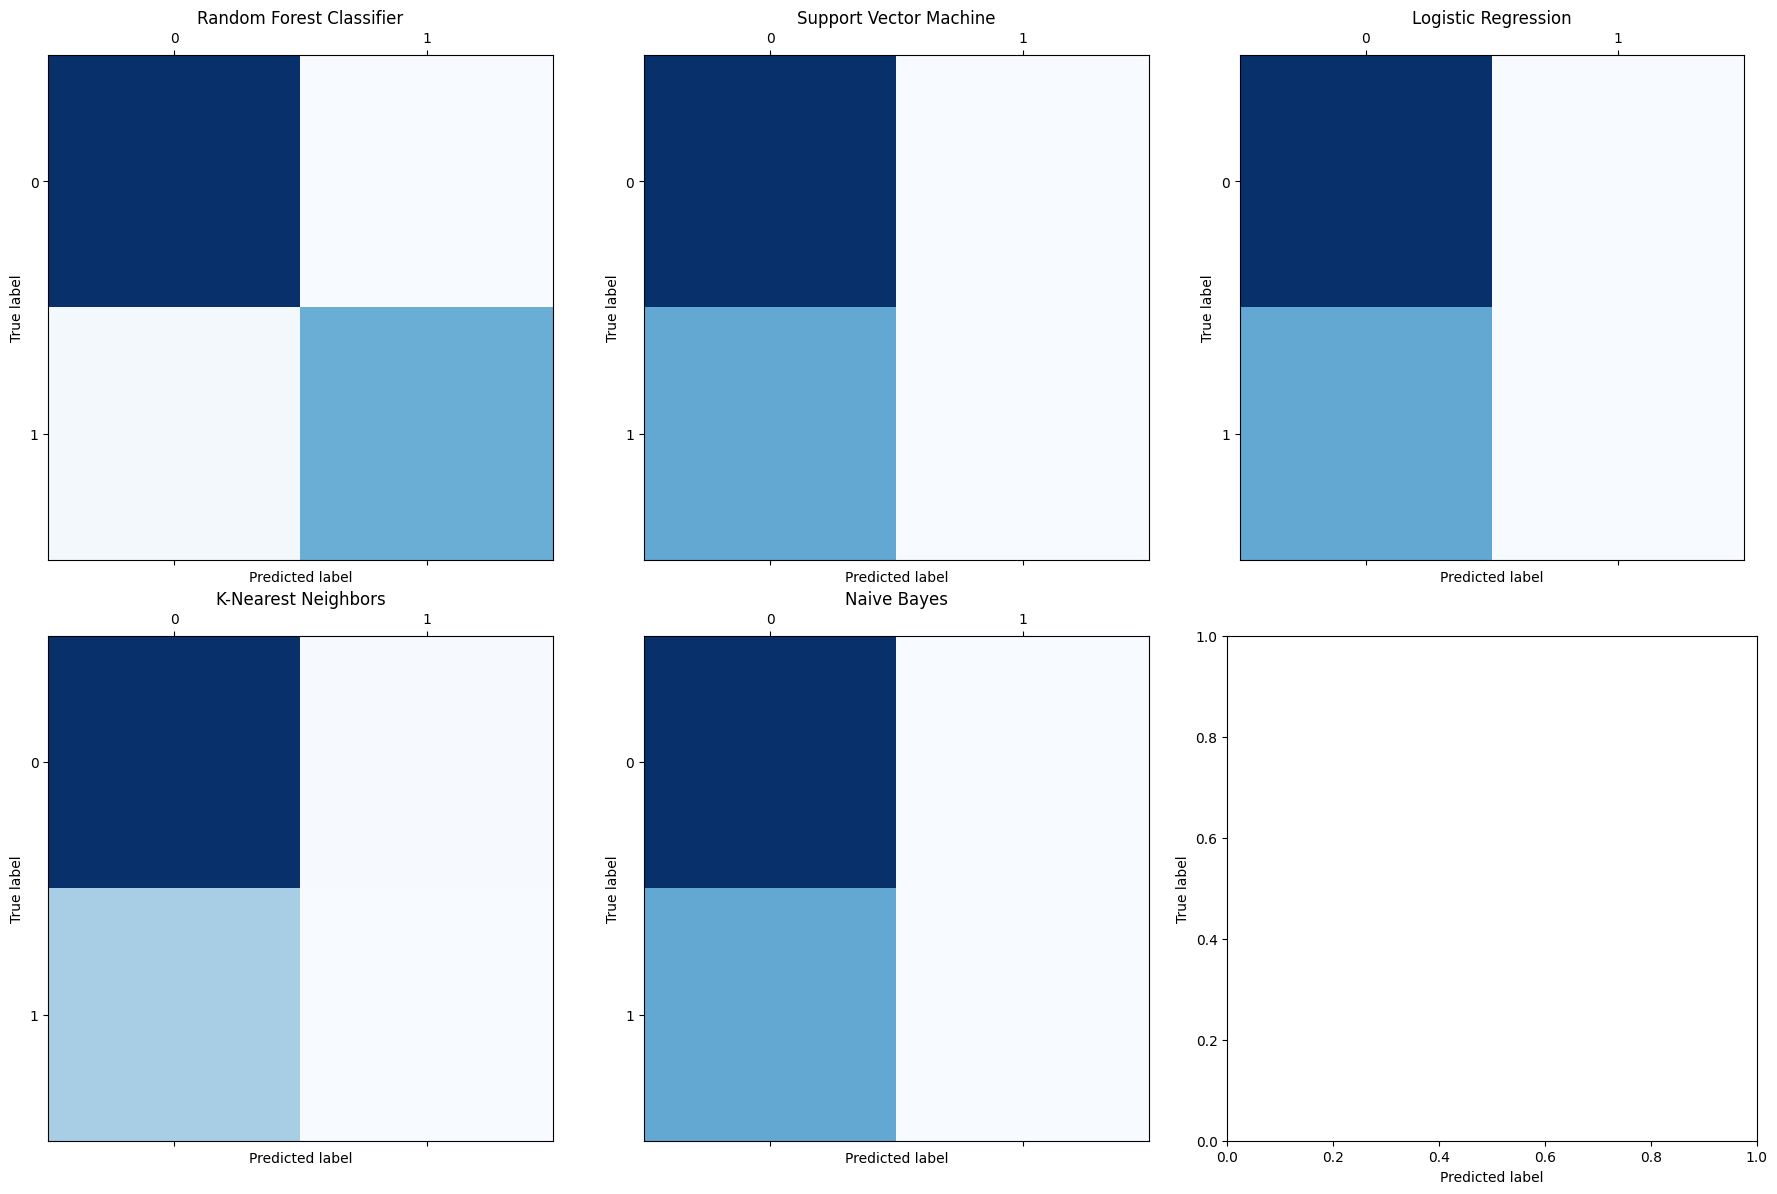

In [239]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_cm = confusion_matrix(y_test, y_pred_rf)

# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_cm = confusion_matrix(y_test, y_pred_svm)

# Logistic Regression (LR)
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_cm = confusion_matrix(y_test, y_pred_lr)

# K Nearest Neighbor (K-NN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
knn_cm = confusion_matrix(y_test, y_pred_knn)

# Naive Bayes (NB)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
nb_cm = confusion_matrix(y_test, y_pred_nb)

# Plot the confusion matrices side-by-side
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

axes[0, 0].matshow(rf_cm, cmap=plt.cm.Blues)
axes[0, 0].set_title('Random Forest Classifier')

axes[0, 1].matshow(svm_cm, cmap=plt.cm.Blues)
axes[0, 1].set_title('Support Vector Machine')

axes[0, 2].matshow(lr_cm, cmap=plt.cm.Blues)
axes[0, 2].set_title('Logistic Regression')

axes[1, 0].matshow(knn_cm, cmap=plt.cm.Blues)
axes[1, 0].set_title('K-Nearest Neighbors')

axes[1, 1].matshow(nb_cm, cmap=plt.cm.Blues)
axes[1, 1].set_title('Naive Bayes')

for ax in axes.flat:
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')

plt.tight_layout()
plt.show()

In [240]:
import joblib

# Save the model to a file
joblib.dump(rf, r"C:\Users\abdul\Desktop\Big Data Project\Model.joblib")

['C:\\Users\\abdul\\Desktop\\Big Data Project\\Model.joblib']